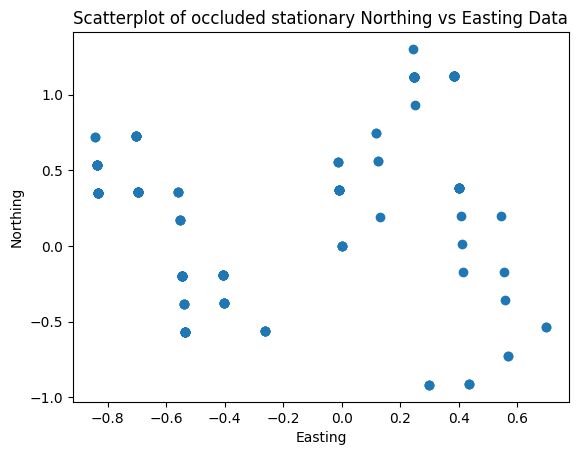

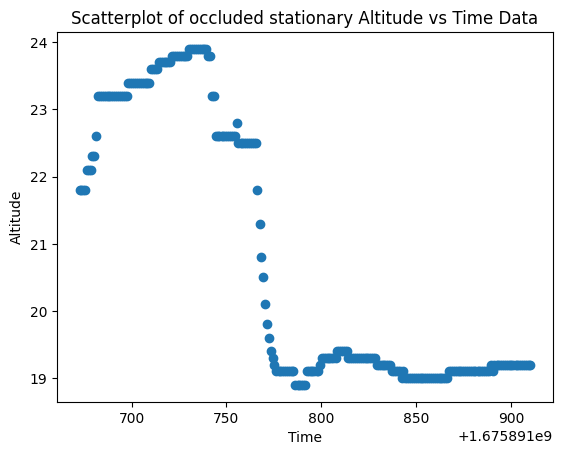

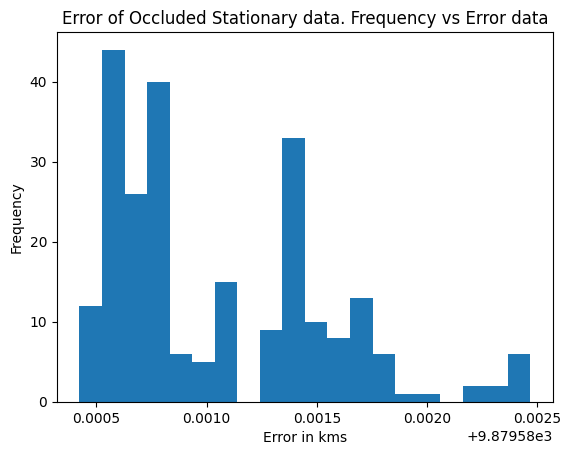

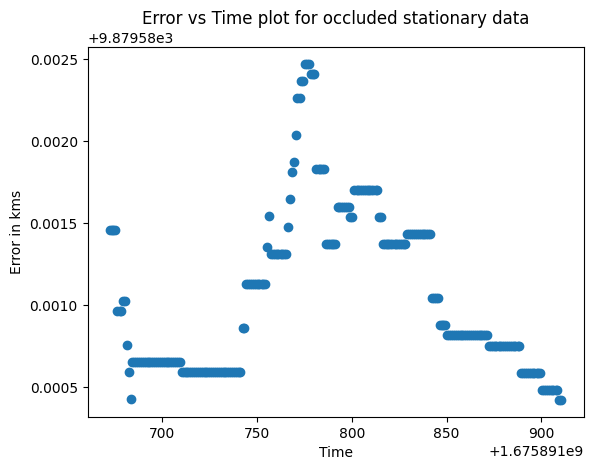

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statistics as st

def distance(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # haversine formula 
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers.
    return c * r


# Load the data from a LibreOffice spreadsheet into a pandas DataFrame
df = pd.read_csv('/home/krishna/EECE5554/LAB1/src/Data/stationary_beside_building/gps.csv')

# Subtract the first value from each column to scale the data with your stationary data sets
easting = df['UTM_easting'] = df['UTM_easting'] - df['UTM_easting'][0]
northing = df['UTM_northing'] = df['UTM_northing'] - df['UTM_northing'][0]
altitude = df['Altitude']
time = df['Time']
latitude = df['Latitude']
longitude = df['Longitude']

# Plotting the scatterplot of northing vs easting data
plt.scatter(easting, northing)
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Scatterplot of occluded stationary Northing vs Easting Data')
plt.show()

# Plotting the scatterplot of Altitude vs Time data
plt.scatter(time, altitude)
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.title('Scatterplot of occluded stationary Altitude vs Time Data')
plt.show()

# Error calculations
k_lat = 42.202285
k_lon = -71.054312
error = []
for i in range(0,239):
    error.append(distance(latitude[i], longitude[i], k_lat, k_lon))

# Error histogram plot
plt.hist(error, bins=20)
plt.xlabel('Error in kms')
plt.ylabel('Frequency')
plt.title('Error of Occluded Stationary data. Frequency vs Error data')
plt.show()

plt.scatter(time,error)
plt.xlabel('Time')
plt.ylabel('Error in kms')
plt.title('Error vs Time plot for occluded stationary data')
plt.show()
